In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
titanic_train=pd.read_csv('train.csv')
titanic_train.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


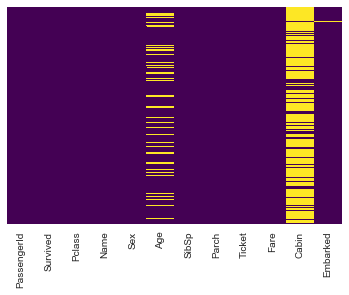

In [54]:
sns.heatmap(titanic_train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [3]:
titanic_train.drop(['Name', 'Ticket'], axis=1, inplace=True)

In [4]:
def adjust_age(col):
    age=col[0]
    Pclass=col[1]
    if pd.isnull(age):
        if Pclass == 1:
            return 37
            #return np.mean(age)
        elif Pclass ==2:
            return 29
            #return np.mean(age)
        else:
            return 24
            #return np.mean(age)
    else:
        return age
    

In [5]:
titanic_train['Age']=titanic_train[['Age', 'Pclass']].apply(adjust_age, axis=1)

In [7]:
titanic_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(3)
memory usage: 69.7+ KB


In [8]:
titanic_train['Sex']= pd.get_dummies(titanic_train['Sex'], drop_first=True)

In [33]:
titanic_train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,7.2500,0
1,2,1,1,0,38.0,1,0,71.2833,0
2,3,1,3,0,26.0,0,0,7.9250,0
3,4,1,1,0,35.0,1,0,53.1000,0
4,5,0,3,1,35.0,0,0,8.0500,0


In [9]:
embarked_dum=pd.get_dummies(titanic_train['Embarked'], drop_first=True)

In [10]:
titanic_train.drop('Embarked', axis=1, inplace=True)
pd.concat([titanic_train, embarked_dum], axis=1)


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Q,S
0,1,0,3,1,22.0,1,0,7.2500,NaN,0,1
1,2,1,1,0,38.0,1,0,71.2833,C85,0,0
2,3,1,3,0,26.0,0,0,7.9250,NaN,0,1
3,4,1,1,0,35.0,1,0,53.1000,C123,0,1
4,5,0,3,1,35.0,0,0,8.0500,NaN,0,1
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,1,27.0,0,0,13.0000,NaN,0,1
887,888,1,1,0,19.0,0,0,30.0000,B42,0,1
888,889,0,3,0,24.0,1,2,23.4500,NaN,0,1
889,890,1,1,1,26.0,0,0,30.0000,C148,0,0


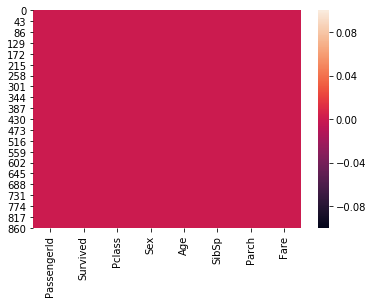

In [11]:
titanic_train.drop('Cabin', axis=1, inplace=True)
sns.heatmap(pd.isnull(titanic_train))

In [12]:
X_train = titanic_train.drop('Survived', axis=1)
Y_train= titanic_train['Survived']
X_train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
PassengerId    891 non-null int64
Pclass         891 non-null int64
Sex            891 non-null uint8
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Fare           891 non-null float64
dtypes: float64(2), int64(4), uint8(1)
memory usage: 42.8 KB


In [71]:
titanic_test= pd.read_csv('test.csv')

In [76]:
titanic_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


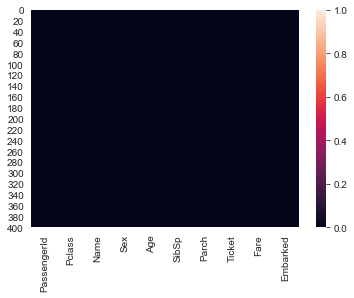

In [83]:
sns.heatmap(pd.isnull(titanic_test))

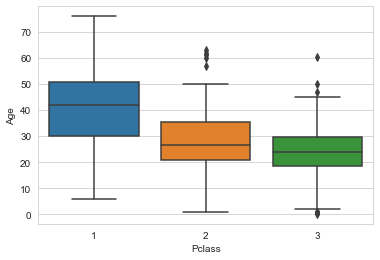

In [14]:
sns.set_style(style='whitegrid')
sns.boxplot(x='Pclass', y='Age', data=titanic_test)


In [72]:
def adjuster_age(col):
    age=col[0]
    Pclass=col[1]
    if pd.isnull(age):
        if Pclass == 1:
            return 41
        elif Pclass ==2:
            return 26
        else:
            return 24
    else:
        return age

In [73]:
titanic_test['Age'] = titanic_test[['Age', 'Pclass']].apply(adjuster_age, axis=1)

In [74]:

titanic_test.drop('Cabin', axis=1, inplace=True)
titanic_test.drop(['Ticket', 'Name'], axis=1, inplace=True)

In [88]:
test_embark_dum=pd.get_dummies(titanic_test['Embarked'], drop_first=True)
titanic_test.drop('Embarked', axis=1, inplace=True)

In [76]:
titanic_test['Sex']=pd.get_dummies(titanic_test['Sex'], drop_first=True)

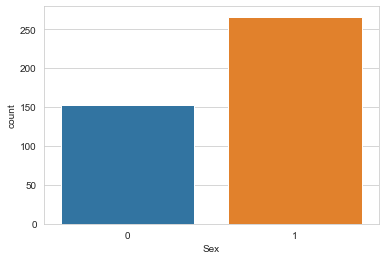

In [20]:
sns.countplot(titanic_test['Sex'])

In [89]:
pd.concat([titanic_test, test_embark_dum], axis=1)


,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Q,S
0,892,3,1,34.5,0,0,7.8292,1,0
1,893,3,0,47.0,1,0,7.0000,0,1
2,894,2,1,62.0,0,0,9.6875,1,0
3,895,3,1,27.0,0,0,8.6625,0,1
4,896,3,0,22.0,1,1,12.2875,0,1
...,...,...,...,...,...,...,...,...,...
413,1305,3,1,24.0,0,0,8.0500,0,1
414,1306,1,0,39.0,0,0,108.9000,0,0
415,1307,3,1,38.5,0,0,7.2500,0,1
416,1308,3,1,24.0,0,0,8.0500,0,1


In [90]:
X_test= titanic_test
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Sex            418 non-null uint8
Age            418 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Fare           418 non-null float64
dtypes: float64(2), int64(4), uint8(1)
memory usage: 20.1 KB


In [79]:
#Null_position=X_test[X_test['Fare']==np.NaN]
empty_Fare_filler=np.mean(X_test['Fare'])
X_test['Fare'].fillna(empty_Fare_filler, inplace=True)

In [152]:
from sklearn.linear_model import LogisticRegression

In [153]:
LogReg= LogisticRegression()

In [154]:
LogReg.fit(X_train, Y_train)

C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [164]:
Titanic_Predictions=LogReg.predict(X_test)

In [35]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [36]:
scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [39]:
scaled_features= scaler.transform(X_train)

In [43]:
Titanic_scaled=pd.DataFrame(scaled_features, columns=X_train.columns)
Titanic_scaled.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare
0,-1.730108,0.827377,0.737695,-0.533834,0.432793,-0.473674,-0.502445
1,-1.726220,-1.566107,-1.355574,0.674891,0.432793,-0.473674,0.786845
2,-1.722332,0.827377,-1.355574,-0.231653,-0.474545,-0.473674,-0.488854
3,-1.718444,-1.566107,-1.355574,0.448255,0.432793,-0.473674,0.420730
4,-1.714556,0.827377,0.737695,0.448255,-0.474545,-0.473674,-0.486337


In [92]:
X_train.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare
0,1,3,1,22.0,1,0,7.2500
1,2,1,0,38.0,1,0,71.2833
2,3,3,0,26.0,0,0,7.9250
3,4,1,0,35.0,1,0,53.1000
4,5,3,1,35.0,0,0,8.0500


In [95]:
scaler.fit(X_test)
Test_scaled_features=scaler.transform(X_test)
Scaled_X_test=pd.DataFrame(Test_scaled_features, columns=X_test.columns)
Scaled_X_test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare
0,-1.727912,0.873482,0.755929,0.395737,-0.499470,-0.400248,-0.498407
1,-1.719625,0.873482,-1.322876,1.360386,0.616992,-0.400248,-0.513274
2,-1.711337,-0.315819,0.755929,2.517965,-0.499470,-0.400248,-0.465088
3,-1.703050,0.873482,0.755929,-0.183053,-0.499470,-0.400248,-0.483466
4,-1.694763,0.873482,-1.322876,-0.568912,0.616992,0.619896,-0.418471


In [99]:
from sklearn.neighbors import KNeighborsClassifier

In [100]:
knn=KNeighborsClassifier(n_neighbors=10)

In [101]:
knn.fit(X_train, Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

In [102]:
knn_pred_10=knn.predict(Scaled_X_test)
Titanic_knn_10=pd.DataFrame({'PassengerId':X_test.PassengerId, 'Survived':knn_pred_1})
Titanic_knn_10.to_csv('Knn_10_Titanic_Submission', index=False)

In [168]:
X_test.columns

Index(['PassengerId', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [173]:
Kaggle_Titanic_Log_Reg=pd.DataFrame({'PassengerId':X_test.PassengerId, 'Survived':Titanic_Predictions})

In [175]:
Kaggle_Titanic_Log_Reg.to_csv('Log_Titanic_Submission', index=False)

In [176]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [178]:
Titanic_Rfc=rfc.predict(X_test)
rfc_predDf=pd.DataFrame({'PassengerId':X_test.PassengerId, 'Survived':Titanic_Rfc})

In [179]:
Titanic_Rand_Forest_Submission=rfc_predDf.to_csv('Rfc_Titanic_Submission', index=False)